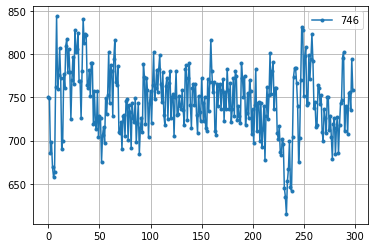

In [1]:
import pandas as pd

df=pd.read_csv('1_f.csv')
df.plot(grid=1, marker='.')

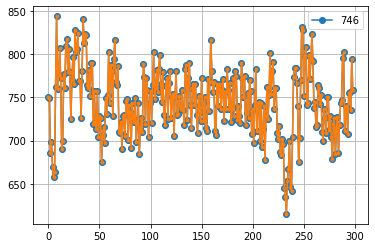

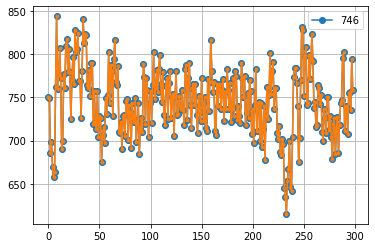

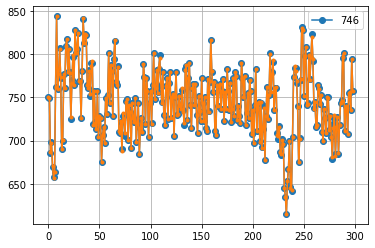

In [2]:
from scipy.interpolate import CubicSpline
from scipy import interpolate
import matplotlib.pyplot as plt

cs=CubicSpline(df.index,df['746'])
f3=cs(df.index)
df.plot(grid=1,marker='o')
plt.plot(df.index,f3, marker='.')
plt.show()

f2 = interpolate.interp1d(df.index, df['746'],kind = 'quadratic')
df.plot(grid=1,marker="o")
plt.plot(df.index,f2(df.index),marker='.')
plt.show

spl = interpolate.UnivariateSpline(df.index, df['746'])
df.plot(grid=1,marker='o')
plt.plot(df.index,spl(df.index),marker=".")
plt.show()

In [3]:
from scipy import fft
y=spl(df.index)
X=fft(y)
print(X)

[ 2.22694000e+05   +0.j          1.69976540e+02-1271.00107134j
  1.34996308e+03-1006.40519962j -4.81755047e+02 -723.92062254j
 -2.19102743e+03 -914.43942734j -6.96552381e+02 -993.98517285j
  2.57842422e+02-1199.89072362j  4.72770008e+02 +861.6586497j
  3.99007499e+02+2684.59191666j -2.08568699e+02 +923.59211982j
 -7.01544502e+02-1089.58255364j  5.70143052e+02 -722.17311802j
 -5.33899773e+02 +915.08976671j -8.03082763e+02+1438.25509788j
 -2.69870489e+02 +178.41285051j  7.44710109e+02 -113.20408017j
 -2.81916815e+02 +211.55612669j -7.10492102e+02 +471.58599499j
 -7.11705681e+02 +102.50354219j  4.36334563e+02   +4.90117472j
 -1.15393595e+01 -181.52805511j -2.73768119e+02  +23.21658889j
  3.58284549e+02 +731.56333243j  1.28275250e+02 +204.85393544j
 -7.93253176e+01 +267.7202564j   6.38147672e+02  -56.8459273j
  6.68344517e+02 +675.18548487j -2.48170981e+02 +571.21442042j
  2.99557475e+02 +476.45885667j  4.12690649e+01  +73.33767459j
  7.18944236e+02 +927.66270776j  7.42955367e+02+1156.9305

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  This is separate from the ipykernel package so we can avoid doing imports until


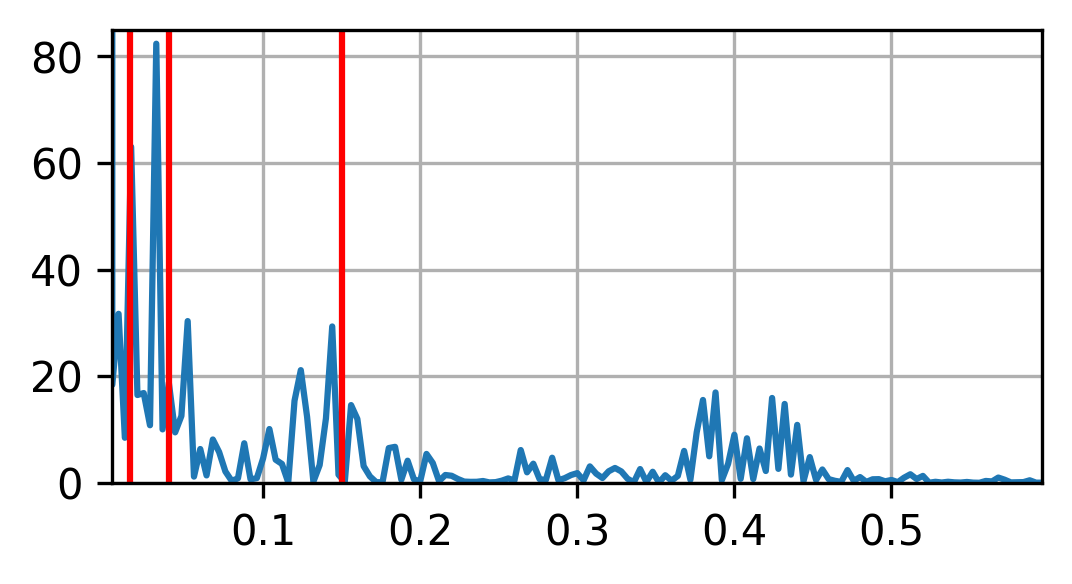

In [4]:
N=df['746'].count()
P=(abs(X)**2)/(N**2)
plt.figure(figsize=(4,2),dpi=300)
plt.plot(df.index/250,P)
plt.axis([1/250,(N-1)/2/250,0,85])
plt.axvline(0.15,0,100,color='r')
plt.axvline(0.04,0,100,color='r')
plt.axvline(0.015,0,100,color='r')
plt.grid()
plt.show()

In [5]:
import numpy as np

HF=0
HF_max=-1
HF_min=np.inf
LF=0
LF_max=-1
LF_min=np.inf
VLF=0
VLF_max=-1
VLF_min=np.inf
ULF=0
ULF_max=-1
ULF_min=np.inf
for i in range (1,int((N-1)/2)):
  if ((df.index[i])/250) >= 0.15:
    HF+=2*P[i]
    if P[i] >= HF_max:
      HF_max=P[i]
    if P[i] <= HF_min:
      HF_min=P[i]
  elif 0.15 > ((df.index[i])/250) >=0.04:
    LF+=2*P[i]
    if P[i] >= LF_max:
      LF_max=P[i]
    if P[i] <= LF_min:
      LF_min=P[i]
  elif 0.04 > ((df.index[i])/250) >=0.015:
    VLF+=2*P[i]
    if P[i] >= VLF_max:
      VLF_max=P[i]
    if P[i] <= VLF_min:
      VLF_min=P[i]
  else:
    ULF+=2*P[i]
    if P[i] >= ULF_max:
      ULF_max=P[i]
    if P[i] <= ULF_min:
      ULF_min=P[i]
print('HF =', HF , 'LF = ', LF , 'VLF = ', VLF , 'ULF = ', ULF)
print('HF_min =', HF_min ,'HF_max = ', HF_max)
print('LF_min =', LF_min ,'LF_max = ', LF_max)
print('VLF_min =', VLF_min ,'VLF_max = ', VLF_max)
print('ULF_min =', ULF_min ,'ULF_max = ', ULF_max)

HF = 531.1628589145395 LF =  448.7704988239518 VLF =  399.2112847444831 ULF =  117.12926001669396
HF_min = 0.011313612850376919 HF_max =  16.955511594472508
LF_min = 0.07921108523973013 LF_max =  30.352229294469794
VLF_min = 10.028112726922801 VLF_max =  82.39550724298918
ULF_min = 8.457947815018809 ULF_max =  31.713870620897673


In [6]:
TP=HF+LF+VLF+ULF
print('TP = ', TP)
P=np.delete(P,0)
print('check: P.sum() = ' ,P.sum())
HF_per=HF/TP*100
LF_per=LF/TP*100
VLF_per=VLF/TP*100
ULF_per=ULF/TP*100
print('HF% = ', HF_per)
print('LF% = ', LF_per)
print('VLF% = ', VLF_per)
print('ULF% = ',ULF_per)

TP =  1496.2739024996683
check: P.sum() =  1496.3167422534366
HF% =  35.49903918174214
LF% =  29.992536665528807
VLF% =  26.68036140158313
ULF% =  7.82806275114592


In [7]:
IC=(VLF+LF)/HF
IVV=LF/HF
ISCA=LF/VLF
print('IC = ', IC)
print('IVV = ', IVV)
print('ISCA = ', ISCA)

IC =  1.5964628726137449
IVV =  0.8448830547772843
ISCA =  1.1241428185357767
